# Data Structure and Algorithm
## Group 8

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

# 1. Exploring the data

## 1.1 Company name

In [59]:
##### Read company names into a dictionary
def readNamesIntoDict():
    d = dict()
    input_file = csv.DictReader(open("SP_500_firms.csv"))
    for row in input_file:
        #print(row)
        d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

In [60]:
namesDict = readNamesIntoDict()

In [61]:
compNames = namesDict.keys()

In [62]:
print(len(namesDict)) # we have 504 companys

504


## 1.2 Company stock prices

In [63]:
##### Prices into standarad Python data structures

# Read prices into dictionary of lists

def readPricesIntoDict():
    input_file = csv.DictReader(open('SP_500_close_2015.csv', 'r')) 
    d = dict()
    for row in input_file:
        for column, value in row.items():
            d.setdefault(column, []).append(value)
    return d


prices = readPricesIntoDict()

In [64]:
len(prices)

497

In [65]:
##### Prices into pandas

# Open data with pandas 
filename = 'SP_500_close_2015.csv'
priceData = pd.read_csv(filename,index_col = 0)

print(type(priceData))
print(priceData.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=496)


In [66]:
priceData.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [67]:
priceData.describe()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,151.240445,45.067555,59.532853,95.540953,27.351820,185.839553,80.967817,163.313504,11.452325,107.930044,...,33.192459,11.069191,42.454640,36.025538,34.701831,38.971944,78.129855,107.543330,28.180492,45.665167
std,7.107680,2.522206,4.742366,6.875068,5.686488,24.958500,6.373760,14.847493,1.288663,8.775297,...,1.329804,1.234858,3.035655,1.275883,1.549875,5.631780,7.133025,7.499312,1.982506,2.258266
min,133.969117,38.121817,46.901920,81.465997,18.213829,134.187800,69.989998,142.671386,8.562809,86.173965,...,30.564587,9.081719,36.734029,32.998169,29.885909,27.600000,65.847064,91.636308,23.501830,39.324541
25%,146.098763,43.318241,55.582699,90.824246,22.882658,166.476869,76.490002,151.131895,10.455896,104.172749,...,32.196438,10.100338,40.161342,35.395930,33.866610,33.460000,71.694150,101.314589,26.931264,43.978874
50%,152.868585,44.921188,59.153699,94.982332,25.408236,182.209625,79.825001,159.705316,11.926511,108.143008,...,33.028862,10.664143,41.758568,36.091841,34.888744,39.355002,77.018419,107.835618,27.954411,45.770399
75%,156.287518,47.124548,63.470802,101.395491,31.392041,201.155203,84.069998,173.011927,12.531814,114.007040,...,34.326218,12.388123,45.348611,36.777727,35.894561,43.884999,85.664143,114.208823,29.715322,47.099767
max,163.841622,49.970225,68.578266,108.674818,39.260511,239.748197,95.559998,200.062855,13.292200,131.110696,...,35.909463,13.431218,49.220191,39.467252,37.264386,50.230000,92.198695,120.001439,32.103599,54.831212


In [68]:
firstPrices =priceData.ix[0] # This is a "series" of first-day prices
print(type(firstPrices))
firstColumnPrices = priceData.ix[:,0] # First company by index
firstColumnPrices.head()

<class 'pandas.core.series.Series'>


Date
2015-01-02    156.678596
2015-01-05    153.145069
2015-01-06    151.511999
2015-01-07    152.610267
2015-01-08    156.267949
Name: MMM, dtype: float64

In [69]:
applePrices = priceData['AAPL'] # Get by column name
msftPrices = priceData['MSFT']
#print(applePrices)
#print(msftPrices)

In [70]:
# Create dataframe from series, then add another series
customPrices = applePrices.to_frame('AAPL')
customPrices = customPrices.join(msftPrices.to_frame('MSFT'))

customPrices.head()

,AAPL,MSFT
Date,,
2015-01-02,105.698620,44.604322
2015-01-05,102.720920,44.194149
2015-01-06,102.730590,43.545497
2015-01-07,104.171098,44.098757
2015-01-08,108.173588,45.396060


In [71]:
# Normalise data by first price
pricesScaled = priceData.divide(priceData.ix[0]) 
pricesScaled.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.977447,1.000223,0.981181,0.983116,0.986090,0.975979,0.995024,0.986819,0.971533,0.986486,...,0.988649,0.978182,0.981651,1.006096,0.937763,0.979271,0.979682,1.037304,0.962531,0.993997
2015-01-06,0.967024,0.988864,0.976324,0.976024,0.967710,0.963755,0.974979,0.986125,0.949635,0.987950,...,0.993909,0.965091,0.967431,1.011030,0.932248,0.980865,0.967657,1.028511,0.925769,0.984299
2015-01-07,0.974034,0.996882,1.015784,0.996511,0.946846,0.980841,0.982997,1.007316,0.951095,1.007770,...,1.002492,0.977455,0.967890,1.011611,0.939601,0.968507,0.999724,1.054090,0.934606,1.004618
2015-01-08,0.997379,1.017372,1.026408,1.011706,0.956284,1.015156,1.008018,1.016145,0.965693,1.040428,...,1.014120,1.004364,0.989450,1.028157,0.946691,1.001196,1.017139,1.065281,0.947685,1.020088


In [72]:
# Plot
priceFig = pricesScaled.plot(legend=False,figsize=(6,4))
priceFig
# Save figure into working directory
#plt.savefig('stocks2015.png', bbox_inches='tight')

In [73]:
len(priceData.columns)

496

# 2. Stock Analysis
## 2.1 Analysing Stocks with Similar Performances
Our features are the daily stock prices, The year return is just not so procise. We need to analyse **daily stock price movements** and get the **daily return of the stock**

In [74]:
priceDailyReturn = pd.DataFrame.copy(priceData) # can't directly assign the priceData to priceDailyReturn dataframe
priceDailyReturn.iloc[:,:] = 0  # make the dataframe elements all to 0
# for loop for every row, shape[0] means row numbers, shape[1] means colums numbers
for i in range(1,int(priceDailyReturn.shape[0])):
    priceDailyReturn.iloc[i,:] = (priceData.iloc[i,:] - priceData.iloc[i-1,:]) / priceData.iloc[i-1,:]     
priceDailyReturn.to_csv("priveDailyReturn.csv")
priceDailyReturn.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399


First, we describe the daily returns for all stocks in the data

In [75]:
pdr_describe = priceDailyReturn.describe()
pdr_describe

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.000168,0.000178,-0.000093,0.000811,0.002789,0.002173,0.001146,-0.000009,-0.001134,0.000987,...,0.000198,-0.000758,0.000526,0.000639,-0.000019,-0.001441,0.000342,-0.000254,0.000041,0.000603
std,0.011636,0.013721,0.020014,0.012870,0.017507,0.015613,0.014766,0.019470,0.017846,0.018285,...,0.011881,0.017959,0.015408,0.010174,0.013108,0.019437,0.020380,0.012862,0.017464,0.018589
min,-0.060268,-0.072777,-0.103288,-0.053355,-0.063169,-0.048394,-0.058324,-0.154261,-0.086876,-0.065226,...,-0.049255,-0.087519,-0.061431,-0.035901,-0.062237,-0.076195,-0.188324,-0.047685,-0.046207,-0.122066
25%,-0.006604,-0.006618,-0.011308,-0.006258,-0.006138,-0.007628,-0.007258,-0.006503,-0.011945,-0.008872,...,-0.006656,-0.010464,-0.008938,-0.005863,-0.007078,-0.011532,-0.008299,-0.007809,-0.009895,-0.008379
50%,0.000234,0.000099,0.001177,0.000618,0.002506,0.001506,0.002456,0.000663,-0.000447,0.001928,...,0.001435,-0.000378,0.000559,0.000965,-0.001103,-0.001913,-0.000437,-0.000135,0.000000,0.000100
75%,0.006016,0.008361,0.010136,0.007365,0.011021,0.011010,0.009962,0.008110,0.009801,0.011526,...,0.008593,0.009967,0.009210,0.006438,0.008422,0.010028,0.009643,0.007122,0.011570,0.008861
max,0.041249,0.042617,0.100739,0.067566,0.118426,0.071632,0.037586,0.111417,0.057490,0.046229,...,0.031543,0.065489,0.067132,0.031662,0.034612,0.062262,0.069102,0.071523,0.067133,0.114062


Then we find the company with the minimum and maximum daily return 

In [76]:
#find the maximum daily return
print('The maximum daily return company is ' + pdr_describe.loc['max'].idxmax())
print(pdr_describe.loc['max'].max())
#find the minimum daily return
print('The minimum daily return company is ' + pdr_describe.loc['min'].idxmin())
print(pdr_describe.loc['min'].min())

The maximum daily return company is FCX
0.286616201466
The minimum daily return company is PWR
-0.285005695727


In [77]:
#find the overall best company
print('The overall best company is ' +pdr_describe.loc['mean'].idxmax())
print(pdr_describe.loc['mean'].max())
#find the overall worst company
print('The overall worst company is ' +pdr_describe.loc['mean'].idxmin())
print(pdr_describe.loc['mean'].min())

The overall best company is NFLX
0.00378946264328
The overall worst company is CHK
-0.0049070365421


In [78]:
#find the most volatility company
print('The most volatility company is ' + pdr_describe.loc['std'].idxmax())
print(pdr_describe.loc['std'].max())
#find the least volatility company
print('The least volatility company is ' + pdr_describe.loc['std'].idxmin())
print(pdr_describe.loc['std'].min())

The most volatility company is FCX
0.0439840636135
The least volatility company is KO
0.00904486717773


## 2.2. Correlation
The calculation of each correlation was completed in the previous part. Using that data, we started with assinging the firm names and correlation into a pandas dataframe.

In [79]:
filename2 = 'SP_500_firms.csv'
firms = pd.read_csv(filename2)
firms.head()
#priceDailyReturnName = priceDailyReturn.coclumns
#priceDailyReturn.columns = list(firms['Name'])
#priceDailyReturn.columns

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ACN,Accenture plc,Information Technology
4,ATVI,Activision Blizzard,Information Technology


In [80]:
cor_price = priceDailyReturn.corr() # for pairwise correlation of dataframe columns
cor_price.head(7)

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145
AYI,0.450872,0.494303,0.269083,0.481309,0.310525,1.000000,0.341863,0.281292,0.311834,0.322694,...,0.292764,0.443355,0.403896,0.478268,0.456437,0.330368,0.231670,0.373889,0.292102,0.306795
ADBE,0.468745,0.585668,0.347331,0.560768,0.482797,0.341863,1.000000,0.291740,0.283060,0.403982,...,0.339726,0.461567,0.460718,0.492877,0.476534,0.313914,0.482703,0.409579,0.445168,0.377819


Here we build our own correlation function to check the result above

In [81]:
def callCor(vec1, vec2):
    """
    input: two vector array
    output: the correlation scores
    """
    vec_idx = range(len(vec1)) # the length of vector
    
    vec1_sum = sum([vec1[i] for i in vec_idx]) # the sum of vector1
    vec2_sum = sum([vec2[i] for i in vec_idx]) # the sum of vector2
    
    vec1_square_sum = sum([pow(vec1[i], 2) for i in vec_idx]) # the sum of vector1 square
    vec2_square_sum = sum([pow(vec2[i], 2) for i in vec_idx]) # the sum of vector2 square
    
    product_sum = sum([vec1[i] * vec2[i] for i in vec_idx]) # the sum of product of vector1 and vector 2
    
    numerator = len(vec1) * product_sum - vec1_sum * vec2_sum
    denominator = (len(vec1) * vec1_square_sum - vec1_sum ** 2)**0.5 * (len(vec1) * vec2_square_sum - vec2_sum ** 2)**0.5
    
    if denominator == 0:
        return 0
    
    result = numerator / denominator
    
    return result

callCor(priceDailyReturn.iloc[:,0],priceDailyReturn.iloc[:,1])

0.59866496204887343

In [84]:
def dfCor(df):
    """
    input: dataframe
    output: the pairwise correlation of dataframe
    """
    colname = list(df.columns) # the column name of dataframe
    
    data = pd.DataFrame(np.zeros([len(colname), len(colname)]), columns= colname, index= colname)
    
    for i in colname:
        for j in colname:
            data.loc[i,j] = callCor(df[i],df[j])
        if i == "ABBV":
            break  
    return data

dfCor(priceDailyReturn).head()
            

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATVI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Because it takes so long time to calculate all the numbers using our own correalation algorithms, so we just calculate the first three company and find that it is the same result with the result using python packages.

After getting all the tables, we created functions to call the full name of a company using its ticker only. There are two ways that we explored in this part. Firstly, the names and the correlation were taken from 2 different tables using a `callName` function and `callCor` function. Secondly, the two tables loaded in the console were merged together to get one table with all the information needed. Then, `callName2` function was created to smoothen the merging. Then, `callCor2` was defined to get the correlation and both names of the companies. 

In [29]:
def callName(n):
    x = firms[firms.Symbol == str(n)].Name.item()
    return str(x)
callName('ABT')

'Abbott Laboratories'

In [30]:
def callName2(n):
    x = namesDict[n][0]
    return x
callName2('ABT')  

'Abbott Laboratories'

In [31]:
def callCor(a, b):
    cor = cor_price[a][b]
    print('The correlation between %s and %s is %s' % (callName(a), callName(b), cor))

callCor('ABT', 'AYI')

The correlation between Abbott Laboratories and Acuity Brands Inc is 0.494302519137


In [32]:
# Merge the name of each company into price dataframe
cor_price_name = cor_price.copy()
cor_price_name['Name'] = ""

for i in list(cor_price_name):
    if i == 'Name':
        pass
    else:
        cor_price_name.set_value(i, 'Name', callName2(i))

cor_price_name.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS,Name
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895,3M Company
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926,Abbott Laboratories
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245,AbbVie
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054,Accenture plc
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145,Activision Blizzard


In [33]:
def callCor2(a, b):
    cor = cor_price_name[a][b]
    name_a = cor_price_name['Name'][a]
    name_b = cor_price_name['Name'][b]
    print('The correlation between %s and %s is equal to %s' % (name_a, name_b, cor))
    
callCor2('ABBV', 'ACN')

The correlation between AbbVie and Accenture plc is equal to 0.318047748008


We ran both correlation calling functions using `%timeit` and the result is the `callCor2` with the merged table was faster with fastest time of 41.1 µs per loop, while `callCor` took approximately 1.38 ms, which is way slower.

In this part we explored the highest and lowest correlation of each company. Using `describe()` function we get the summary of each column. Using those informations, a new table containing the company ticker and their lowest and highest correlation with their corresponding tickers.

In [34]:
cor_price.describe()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.461465,0.502471,0.318588,0.485292,0.342000,0.358049,0.407217,0.286596,0.338180,0.337362,...,0.337608,0.423734,0.404635,0.449822,0.470841,0.306327,0.299765,0.398030,0.417373,0.306473
std,0.120494,0.114988,0.085071,0.118383,0.095141,0.086053,0.108851,0.082113,0.085109,0.105296,...,0.163069,0.098588,0.094782,0.117506,0.120059,0.088284,0.086804,0.097566,0.159499,0.093307
min,0.161831,0.165613,0.075441,0.158036,0.003083,0.110716,0.031734,-0.031248,0.083691,0.017283,...,0.029882,0.145285,0.152021,0.121672,0.161702,0.045175,0.018138,0.148654,0.030176,0.039721
25%,0.383004,0.421799,0.267029,0.396349,0.290686,0.300497,0.340668,0.236980,0.285399,0.280438,...,0.236055,0.350543,0.342716,0.365252,0.381844,0.260932,0.252634,0.335236,0.321455,0.242796
50%,0.466096,0.512526,0.314621,0.486101,0.347423,0.362478,0.414762,0.288885,0.342235,0.336069,...,0.305559,0.430159,0.405600,0.455105,0.474097,0.308786,0.310659,0.396175,0.415606,0.306866
75%,0.546741,0.584136,0.363310,0.577805,0.407418,0.414250,0.486107,0.344370,0.397316,0.395577,...,0.399817,0.497980,0.469120,0.532872,0.556206,0.365374,0.356226,0.466059,0.500168,0.363110
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#find the bottom correlated companies
cor_bottom = cor_price.abs().idxmin(axis=0)
cor_bottom = pd.DataFrame(cor_bottom, columns = ["cor_bottom"])
#find the bottom correlation coefficients
cor_coe = cor_price.abs().min(axis=0)
cor_coe = pd.DataFrame(cor_coe, columns = ["cor_bot_coe_abs"])
#join the bottom correlation company and coefficients together
result = cor_bottom.join(cor_coe)
result.head()

,cor_bottom,cor_bot_coe_abs
MMM,NEM,0.161831
ABT,NRG,0.165613
ABBV,NEM,0.075441
ACN,NEM,0.158036
ATVI,PWR,0.003083


In [36]:
#find the top correlated company
#first replace the correlation 1 to 0 to find the top correlated company
cor_modify = cor_price.replace(1,-1)
cor_top = cor_modify.idxmax(axis=0) 
cor_top = pd.DataFrame(cor_top, columns = ["cor_top"])
top_coe = cor_modify.max(axis=0)
top_coe = pd.DataFrame(top_coe, columns = ["top_coe"])
result2 = cor_top.join(top_coe)
result2.head()

,cor_top,top_coe
MMM,ITW,0.768481
ABT,MMC,0.737158
ABBV,TMO,0.575175
ACN,MMC,0.725520
ATVI,EA,0.561049


In [37]:
# Then we combine the top and bottom company together 
related = result.join(result2)
related.head()

,cor_bottom,cor_bot_coe_abs,cor_top,top_coe
MMM,NEM,0.161831,ITW,0.768481
ABT,NRG,0.165613,MMC,0.737158
ABBV,NEM,0.075441,TMO,0.575175
ACN,NEM,0.158036,MMC,0.725520
ATVI,PWR,0.003083,EA,0.561049


The maximum and minimum correlation table was created. Thus, we could find the correlation of five tech companies, i.e. Amazon, Microsoft, Facebook, Apple and Google. The tickers of these companies are AMZN, MSFT, FB, AAPL, and GOOG/GOOGL (Google has two for Class A and Class C shares) respectively.

In [38]:
techCor = related.ix[['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOG', 'GOOGL'],:]
techCor

,cor_bottom,cor_bot_coe_abs,cor_top,top_coe
AMZN,SRCL,0.056440,GOOGL,0.585572
MSFT,SRCL,0.028884,MMC,0.604546
FB,NEM,0.002831,FISV,0.619677
AAPL,RRC,0.112708,ITW,0.601265
GOOG,SRCL,0.017145,GOOGL,0.989365
GOOGL,RIG,0.009515,GOOG,0.989365


In [39]:
for j in list(techCor.index):
    callCor2(j, techCor.ix[j,0])
    callCor2(j, techCor.ix[j,2])

The correlation between Amazon.com Inc and Stericycle Inc is equal to 0.0564404668271
The correlation between Amazon.com Inc and Alphabet Inc Class A is equal to 0.585572457937
The correlation between Microsoft Corp. and Stericycle Inc is equal to 0.0288841252305
The correlation between Microsoft Corp. and Marsh & McLennan is equal to 0.604546183629
The correlation between Facebook and Newmont Mining Corp. (Hldg. Co.) is equal to -0.00283066410658
The correlation between Facebook and Fiserv Inc is equal to 0.619677467282
The correlation between Apple Inc. and Range Resources Corp. is equal to 0.112708151299
The correlation between Apple Inc. and Illinois Tool Works is equal to 0.601265458624
The correlation between Alphabet Inc Class C and Stericycle Inc is equal to 0.0171445946964
The correlation between Alphabet Inc Class C and Alphabet Inc Class A is equal to 0.989365335424
The correlation between Alphabet Inc Class A and Transocean is equal to 0.0095152561825
The correlation betwee

We obtained the maximum and minimum correlation of the 5 technology companies. Google who trades with two tickers (GOOG and GOOGL) will always be highly correlated to each other since the two stocks are essentially identical despite the difference in voting rights. However, their lowest correlation are different although both companies comes from a different industry. Two tech giants, Amazon Inc and Google stocks have relatively high correlation to each other with a correlation of 0.59, which is not too surprising since they released almost the same products recently.

The biggest surprise might come from Apple that was closely related to Illinois Tool Works (ITW), a manufacturing company. However, ITW also produces small electronic components, which made the correlation less surprising. Moreover, Facebook's maximum correlation came from a company called Fiserv, a financial technology company. Online payment might be an area that Facebook looking to explore, which could make sense of the correlation. Interestingly, the majority of the Tech companies had their lowest correlation against companies operating in natural resources, especially Oil and Gas.


# 3. Clustering algorithm

In [40]:
cor_price_graph = cor_price.copy()
cor_price_graph.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.598665,1.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.322637,0.483668,1.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.632050,0.644078,0.318048,1.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.418519,0.434357,0.226854,0.462558,1.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145


In [41]:
for i in range(0,cor_price_graph.shape[0]):
    for j in range(i,cor_price_graph.shape[1]):
            cor_price_graph.iloc[j,i] = 0
cor_price_graph.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,0.0,0.598665,0.322637,0.632050,0.418519,0.450872,0.468745,0.257132,0.335379,0.317369,...,0.409629,0.499817,0.507627,0.543725,0.623740,0.316707,0.356203,0.433634,0.486263,0.293895
ABT,0.0,0.000000,0.483668,0.644078,0.434357,0.494303,0.585668,0.371080,0.450206,0.464380,...,0.453393,0.538238,0.507487,0.619808,0.567308,0.376218,0.388071,0.640906,0.512479,0.463926
ABBV,0.0,0.000000,0.000000,0.318048,0.226854,0.269083,0.347331,0.292497,0.303988,0.419361,...,0.261255,0.291590,0.323336,0.267432,0.321926,0.307018,0.289727,0.508626,0.323670,0.406245
ACN,0.0,0.000000,0.000000,0.000000,0.462558,0.481309,0.560768,0.303224,0.395808,0.401344,...,0.388994,0.531869,0.510195,0.563160,0.615344,0.431342,0.353530,0.461179,0.546650,0.414054
ATVI,0.0,0.000000,0.000000,0.000000,0.000000,0.310525,0.482797,0.223472,0.198081,0.285139,...,0.295286,0.369710,0.398587,0.388844,0.396983,0.365830,0.330461,0.370655,0.346774,0.323145


In [42]:
#save the graph to csv file
cor_price_graph.to_csv('cor_price_graph.csv')

## 3.1.Represent the edge

In [43]:
edge = [] # make the edge a list so that we can sort it more conveniently
for i in cor_price_graph.columns[0:cor_price_graph.shape[0]]:
    for j in cor_price_graph.index[0:cor_price_graph.shape[1]]:
        if(cor_price_graph[i][j] == 0):
            pass
        else:
            t = (cor_price_graph[i][j], i, j)  # denote the edge with (source, destination, weight)
            edge.append(t)

In [44]:
len(edge)

122760

There are 122760 edges in total and we sort those edges from the highest to lowest

In [52]:
# sorted the edge by weight(correlation)
edge_sorted = sorted(edge, key = lambda edge: edge[0], reverse=True)
edge_sorted[0:20]

[(0.99999999998958355, 'TYC', 'JCI'),
 (0.98936533542371641, 'GOOG', 'GOOGL'),
 (0.9772964706960382, 'FOX', 'FOXA'),
 (0.97468693249343563, 'NWS', 'NWSA'),
 (0.95862277805527796, 'DISCK', 'DISCA'),
 (0.92459154461690818, 'STI', 'BBT'),
 (0.92183689634860255, 'STI', 'PNC'),
 (0.91872546915349163, 'STI', 'HBAN'),
 (0.91744483601599958, 'DTE', 'CMS'),
 (0.91668172739329046, 'MET', 'LNC'),
 (0.91665580199911156, 'JPM', 'C'),
 (0.91587402651772964, 'EQR', 'AVB'),
 (0.91526890116568038, 'PRU', 'MET'),
 (0.91242682367066807, 'WFC', 'PNC'),
 (0.90858198736457718, 'XEL', 'CMS'),
 (0.90854263696941329, 'UDR', 'EQR'),
 (0.90822201011698056, 'HAL', 'BHI'),
 (0.90820313676216835, 'ESS', 'AVB'),
 (0.90568929732937653, 'PNC', 'BBT'),
 (0.90567047869034278, 'XEL', 'DTE')]

## 3.2. Model the sets of nodes

First, initialize each node points to itself

In [53]:
nodePointers = {}
length = cor_price_graph.shape[0]
for i in cor_price_graph.columns[0:length]:
    nodePointers[i] = i

## 3.3 Clustering algorithm

We believe this greedy algorithm is called Kruskal’s algorithm. Which is used to solve the minimum-spanning-tree problem in graph theory. The difference between our implementation and the classical Kruskal’s algorithm, is that we start with the heaviest edges and that we limit our iterations to a given k.

In [90]:
def createVertices():
    #a graph consists of two elements: a list of vertices (companies) and a list of edges(correlation between two companies)
    graph = {}
    graph = cor_price_graph.columns.tolist()  
    return graph

def getClusters(k):
    vertices = createVertices()
    edges = edge_sorted #sort edges based on weight with the highest weighed edge first in list
    clusters = []
    for vertex in vertices:
        s = set()
        s.add(vertex)
        clusters.append(s)
    #Iterate through the k highest correlation-edges
    for i in range(0, k):
        edge = edges[i]
        source_cluster = findVertexSet(clusters, edge[1]) #find which cluster the source of the edge belongs to
        destination_cluster = findVertexSet(clusters, edge[2]) #find which cluster the destination of the edge belongs to
        if (source_cluster != destination_cluster): # if the edge is connecting two different sets (source and destination is currently in two different sets)
            merged_cluster = source_cluster.union(destination_cluster) #merge source-cluster with destination-cluster
            clusters.remove(source_cluster) #remove source-cluster from the cluster-list
            clusters.remove(destination_cluster) #remove destination-cluster from the cluster-list
            clusters.append(merged_cluster) #add the newly merged cluster to the cluster-list
    return clusters

#returns the cluster for which a company resides in
def findVertexSet(clusters, company):
    for cluster in clusters:
        if company in cluster:
            return cluster
    return None

print(getClusters(30))
a = len(getClusters(30))
b = len(getClusters(100))
c = len(getClusters(1000))
print(a, b, c)


[{'MMM'}, {'ABT'}, {'ABBV'}, {'ACN'}, {'ATVI'}, {'AYI'}, {'ADBE'}, {'AAP'}, {'AES'}, {'AET'}, {'AMG'}, {'AFL'}, {'A'}, {'APD'}, {'AKAM'}, {'ALK'}, {'ALB'}, {'AA'}, {'ALXN'}, {'ALLE'}, {'AGN'}, {'ADS'}, {'LNT'}, {'ALL'}, {'MO'}, {'AMZN'}, {'AEE'}, {'AAL'}, {'AEP'}, {'AXP'}, {'AIG'}, {'AMT'}, {'AWK'}, {'AMP'}, {'ABC'}, {'AME'}, {'AMGN'}, {'APH'}, {'APC'}, {'ADI'}, {'ANTM'}, {'AON'}, {'APA'}, {'AIV'}, {'AAPL'}, {'AMAT'}, {'ADM'}, {'AJG'}, {'AIZ'}, {'T'}, {'ADSK'}, {'ADP'}, {'AN'}, {'AZO'}, {'AVGO'}, {'AVY'}, {'BLL'}, {'BCR'}, {'BAX'}, {'BDX'}, {'BBBY'}, {'BRK-B'}, {'BBY'}, {'BIIB'}, {'BLK'}, {'HRB'}, {'BA'}, {'BWA'}, {'BXP'}, {'BSX'}, {'BMY'}, {'BF-B'}, {'CHRW'}, {'CA'}, {'COG'}, {'CPB'}, {'COF'}, {'CAH'}, {'KMX'}, {'CCL'}, {'CAT'}, {'CBG'}, {'CBS'}, {'CELG'}, {'CNC'}, {'CNP'}, {'CTL'}, {'CERN'}, {'CF'}, {'SCHW'}, {'CHK'}, {'CVX'}, {'CMG'}, {'CB'}, {'CHD'}, {'CI'}, {'XEC'}, {'CINF'}, {'CTAS'}, {'CSCO'}, {'CFG'}, {'CTXS'}, {'CME'}, {'COH'}, {'CTSH'}, {'CL'}, {'CMCSA'}, {'CAG'}, {'CXO'}, {'

### 3.3.1 Comparing different values of k

When k = 30 we have 474 clusters and two of them are: {'ZION', 'CMA'} and {'C', 'JPM', 'BAC'}. When k = 100 we have 449 clusters. If we look at the two earlier clusters (from when k = 30), we see that these two clusters is now in one cluster (k = 100): {'WFC', 'FITB', 'RF', 'BAC', 'GS', 'BBT', 'MS', 'USB', 'STI', 'C', 'HBAN', 'CMA', 'JPM', 'ZION', 'KEY', 'PNC'}. This makes sense since both clusters included companies from the financial sector, and we would expect these companies to have a high correlation.

By increasing k, more companies with high correlation will merge into bigger clusters and the number of clusters will decrease as long as the companies is not already in the cluster. As we can see from the length of the list, by changing k from 100 to 1000 will reduce the number of clusters from 449 to 327. However, since the correlation-edge is decreasing in each iteration by having a very large k-value, a large k-value would cluster a lot of companies, and these might not have as high correlation.


### 3.3.2 Verify that the stocks in the clusters perform similarly

When using k = 30 we get (among others) a cluster with ZION and CMA, and a cluster including C, JPM and BAC. We will look at these two clusters to see if it makes sense that they are in the same cluster, and also verify that they perform similarly.

#### Cluster1: ZION & CMA

In [99]:
zionPrices = priceData['ZION'] 
cmaPrices = priceData['CMA']

cluster1Prices = zionPrices.to_frame('ZION')
cluster1Prices = cluster1Prices.join(cmaPrices.to_frame('CMA'))

cluster1Scaled = cluster1Prices.divide(cluster1Prices.ix[0]) 


In [100]:
cluster1Scaled.head()

,ZION,CMA
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,0.962531,0.964355
2015-01-06,0.925769,0.935407
2015-01-07,0.934606,0.944480
2015-01-08,0.947685,0.964355


In [102]:
cluster1Fig = cluster1Scaled.plot(legend=False,figsize=(6,4))
plt.savefig('cluster1price.png', bbox_inches='tight')

In [106]:
zionReturns = priceDailyReturn['ZION'] 
cmaReturns = priceDailyReturn['CMA']

cluster1Returns = zionReturns.to_frame('ZION')
cluster1Returns = cluster1Returns.join(cmaReturns.to_frame('CMA'))

cluster1ReturnFig = cluster1Returns.plot(legend=False,figsize=(6,4))
plt.savefig('cluster1return.png', bbox_inches='tight')

From the two figures we can verify that these two companies perform similarly on both price and return. If we look into what the companies are doing, we can see some similarities. ZION is a bank holding company and CMA is a financial service company. Both are in the financial sector and located in the United States, so in this case the clustering makes sense.

#### Cluster2: C, JPM & BAC

In [ ]:
cPrices = priceData['C'] 
jpmPrices = priceData['JPM']
bacPrices = priceData['BAC']

cluster2Prices = cPrices.to_frame('C')
cluster2Prices = cluster2Prices.join(jpmPrices.to_frame('JPM'))
cluster2Prices = cluster2Prices.join(bacPrices.to_frame('BAC'))

cluster2Scaled = cluster2Prices.divide(cluster2Prices.ix[0])

In [ ]:
cluster2Scaled.head()

In [ ]:
cluster2Fig = cluster2Scaled.plot(legend=False,figsize=(6,4))
plt.savefig('cluster2price.png', bbox_inches='tight')

In [ ]:
cReturns = priceDailyReturn['C'] 
jpmReturns = priceDailyReturn['JPM']
bacReturns = priceDailyReturn['BAC']

cluster2Returns = cReturns.to_frame('C')
cluster2Returns = cluster2Returns.join(jpmReturns.to_frame('JPM'))
cluster2Returns = cluster2Returns.join(bacReturns.to_frame('BAC'))

cluster2ReturnFig = cluster2Returns.plot(legend=False,figsize=(6,4))
plt.savefig('cluster2return.png', bbox_inches='tight')

From the two figures we can verify that these three companies perform similarly on both price and return. If we look into what the companies are doing, we can see a lot of similarities. The three companies C (Citigroup Inc), JPM (JP Morgan Chase & Co) and BAC (Bank of America Corporation) are all multinational banking and financial services companies. They are all in the financial sector and have their headquarter in the United States, so in this case the clustering makes sense.

# 4. Extra Part
## 4.1. In-depth Analysis

In this part we are going to analyse the clusters by testing the return and volatility. To do this we set different $k$ to get different number of clusters consisting of different stocks. Our initial hypothesis suggest that if there are more stocks from different clusters, the portfolio is more diversified. 

In this analysis we use the one year return of each stock by calculating the difference in price on the first and the last day of trading of the year. We assume that an investor holds the portfolios without selling any stocks during one year period. To simplify the analysis, the number of stock held is only one unit of stock for each ticker. Then, from each cluster, two random stocks are added into the portfolio to test the investor's diversification.

We initiate the cluster by dividing the stocks that has already been assigned to a cluster that the ones that has not using `portfolioGen` function. Then, from each cluster In order to get the data needed to calculate both returns and volatility, a `portfTable` function is created, which includes the price on day 1 and the last day, the weight of each stock in the portfolio and the return of each stock. Then, from the table we could obtain the weighted return of each stock and to get the overall return of the portfolio we call `portfReturn` function.

In [85]:
from random import randint

def clusterGroup(clusters): # separate clustered stocks and non-clustered stocks
    group = []
    for cluster in clusters:
        if len(cluster) > 1:
            group.append(cluster)
    return group

def portfolioGen(group): # this is to generate portfolio using specified number of stocks from each cluster
    portf = []  
    for cluster in group:
        portf.append(list(cluster)[0]) # in this case, we chose 2 stocks from each cluster
        portf.append(list(cluster)[randint(1, len(cluster)-1)])
    return portf

def portfTable(cluster): # create a helper table to get all information needed to calculate risk and return
    portf = priceData.ix[[0,251], cluster]
    portf = portf.T
    portf.ix[:, 'weight'] = portf.ix[:,0] / portf.ix[:,0].sum() # the proportion of holding a stock in the portfolio
    portf.ix[:, 'one_y_return'] = portf.ix[:,1] - portf.ix[:,0] # nominal return of holding a stock for a year
    portf.ix[:, 'percent_return'] = portf.ix[:,3] / portf.ix[:,1] * 100
    portf.ix[:, 'weighted_return'] = portf.ix[:,4] * portf.ix[:, 2]
    return portf

def portfReturn(table): # calculate the return of a portfolio
    port_return = sum(table.weighted_return)
    return port_return

Secondly, we calculate the volatility of portfolio, the naive calculation of this is simply multiply individual stock's standard deviation by the weight of it in the portfolio. However, we used the covariance to calculate the portfolio's risk. To get the accurate number, we need the daily return of each stock which is represented by `portfDaily` function. After getting the daily retrun, we use the information in `portfTable` function and combine them to get the risk of the portfolio.

In [87]:
def portfDaily(cluster): # obtain the daily price return of stocks in portfolio
    dailyR = priceDailyReturn.ix[:, cluster] #slice the daily return table
    return dailyR

def portfVolatility(daily_return, table):
    covmatrix = np.cov(daily_return[1:].T) # calculate the covariance of the portfolio stocks daily return
    weight = np.array(table.weight) # the weight of portfolio
    volatility = np.sqrt(weight.T.dot(covmatrix).dot(weight)) # calculate the standard deviation of the portfolio
    return volatility

The next step is to obtain the data by getting the clusters from the set of edges in the previous sections. We tried 48 different $k$, which will return as 48 different portfolios, and create a table of risk and return. 

In [114]:
k_list = list(range(100, 2000, 50)) + list(range(2000, 3050, 100))

ClusGroup = []

for k in k_list: # initiate the cluster
    cluster = getClusters(k)    
    ClusGroup.append(clusterGroup(cluster))

no_cluster = []
for group in ClusGroup: # calculate the number of cluster for each k
    no_cluster.append(len(group))

portfolioGroup = []
for cluster in ClusGroup: # take 2 random stocks from each cluster to portfolio
    portfolioGroup.append(portfolioGen(cluster))

GroupReturn = []
for portf in portfolioGroup: # create helper table and calculate return
    GroupReturn.append(portfReturn(portfTable(portf)))

GroupVolatility = []
for portf in portfolioGroup: # 
    dailyR = portfDaily(portf)
    table = portfTable(portf)
    GroupVolatility.append(portfVolatility(dailyR, table) * 100)

ClusterRiskReturn = pd.DataFrame({
    'k': k_list,    
    'no_cluster': no_cluster,
    'returns': GroupReturn,
    'volatility': GroupVolatility
    })
    
ClusterRiskReturn


,k,no_cluster,returns,volatility
0,100,13,10.759082,1.179895
1,150,17,7.603076,1.074179
2,200,15,6.757638,1.134087
3,250,17,5.207840,1.123649
4,300,21,2.777369,1.113634
5,350,18,6.950363,1.142781
6,400,18,7.421905,1.112324
7,450,17,7.269856,1.156584
8,500,20,7.640728,1.116464
9,550,21,10.930222,1.103515


The relationship between the number of clusters, returns and volatility became quite clear from the table. The graph is also plotted below.

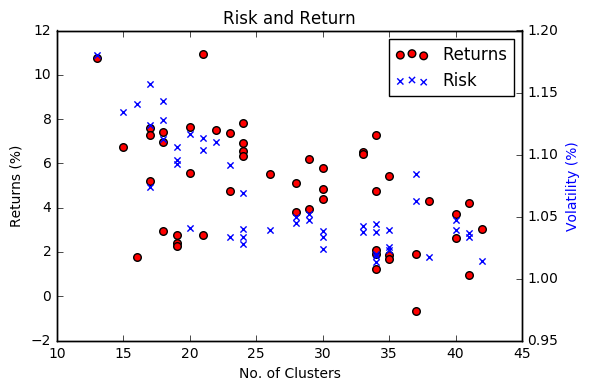

In [115]:
def plot_portf_return():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    ax1.scatter(ClusterRiskReturn.no_cluster, ClusterRiskReturn.returns, s=30, c = 'r', label = 'Returns')
    ax2.scatter(ClusterRiskReturn.no_cluster, ClusterRiskReturn.volatility, c = 'b', marker='x', label = 'Risk')    
    
    ax1.set_xlabel('No. of Clusters')
    ax1.set_ylabel('Returns (%)')
    ax2.set_ylabel('Volatility (%)', color = 'b')
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)    

    plt.title('Risk and Return')
    plt.show()
    # plt.savefig('plot_portf_return.png', dpi = 300, bbox_inches='tight')

plot_portf_return()

According to the table and graph, as the number of clusters go up, the portfolio that contains 2 stocks from each cluster generally has less return and less volatility. It indicates that building portfolio based on more clusters is one way to diversify a portfolio as the risk goes down. The riskiness seems to hit an optimal level when $k$ is between 1500 to 1700 edges. With the number of cluster of around 34 to 35, the volatility is very close to 1 percent. Interestingly, as $k$ goes up and the number of cluster shrinks due to some cluster combination, the volatility become slightly lower but the returns fall significantly. The number of stocks in one cluster increases as more edges are explored and it increase the variation of stocks that can be picked in a portfolio. In clusters with bigger $k$, the risk is already diversified slightly as some clusters that behave differently are combined into one big cluster.

The relationship among clusters, risk and returns was highlighted by this figures but there are more things that could be explored. So far, we created a portfolio under the assumption that the portfolio holders invest in the same number of stock for every given stock. In reality, many investors adjust the weight of one stock according to the risk and return. In addition, we added only two stocks from one portfolio and there could be more possibilities if different numbers are added based on the characteristic of each cluster.



## 4.2. Exploring other clustering methods

In [54]:
priceDailyReturn.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399


In [14]:
import matplotlib.pyplot as plt

### 4.2.1. K-Means clustering

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

In [32]:
kmeans.fit(priceDailyReturnArray)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [33]:
centroids = kmeans.cluster_centers_

In [35]:
labels = kmeans.labels_

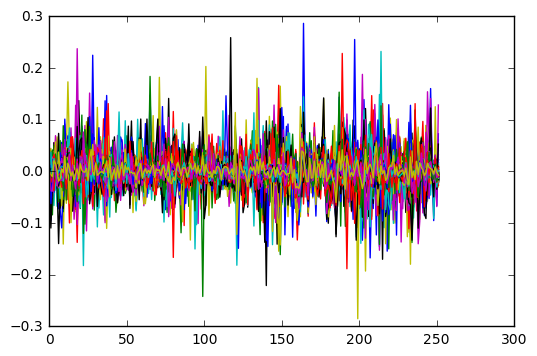

In [39]:
for item in priceDailyReturn.values.T:
    plt.plot(item)
plt.show()

In [51]:
priceDailyReturn.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399


In [ ]:
#kmeans clustering
def cluster_data(data, n_clusters = 8):
    cluster_model = KMeans(n_clusters = n_clusters)
    predition = cluster_model.fit_predict(data)
    return predition, cluster_model, data

priceDailyReturnTrans = priceDailyReturn.T
predition, model, data = cluster_data(priceDailyReturnTrans, n_clusters = 8)

In [66]:
#print("Cluster Count: %s" % len(np.unique(predition)))
priceDailyReturnTrans["2015-12-22"].max()

0.058399949384615457

In [77]:
priceDailyReturnTrans["Cluster"] = predition
priceDailyReturnTrans.describe()

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Cluster
count,496.0,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.0,-0.018962,-0.010010,0.012231,0.017965,-0.007984,-0.008655,-0.002744,-0.005203,-0.009161,...,-0.015032,0.007685,0.011021,0.016820,-0.001247,-0.003727,0.010078,-0.008243,-0.007119,4.929435
std,0.0,0.017372,0.013263,0.013755,0.012121,0.011830,0.015889,0.012463,0.014942,0.015385,...,0.015841,0.014029,0.012427,0.020103,0.005951,0.012595,0.008169,0.008574,0.011815,1.832663
min,0.0,-0.109470,-0.083973,-0.065976,-0.035922,-0.067464,-0.139584,-0.075449,-0.109316,-0.140566,...,-0.091139,-0.057628,-0.052489,-0.045791,-0.030000,-0.095112,-0.013139,-0.068047,-0.029802,0.000000
25%,0.0,-0.027428,-0.017663,0.004792,0.010950,-0.014427,-0.014121,-0.008296,-0.013075,-0.016901,...,-0.023678,0.001942,0.004049,0.006896,-0.003957,-0.006165,0.006031,-0.011369,-0.012362,4.000000
50%,0.0,-0.017629,-0.010264,0.012312,0.017241,-0.008407,-0.007345,-0.001458,-0.005546,-0.007955,...,-0.016032,0.007070,0.010081,0.012710,-0.001062,-0.001511,0.009676,-0.007170,-0.009357,5.000000
75%,0.0,-0.009206,-0.001751,0.019050,0.024251,-0.001423,-0.000510,0.003566,0.003210,-0.000273,...,-0.008438,0.012845,0.016004,0.020000,0.001362,0.002353,0.013576,-0.003452,-0.004933,7.000000
max,0.0,0.044629,0.041624,0.056083,0.069239,0.066901,0.073617,0.059818,0.056332,0.088563,...,0.089286,0.154252,0.058400,0.160436,0.037860,0.021414,0.125307,0.023607,0.128571,7.000000


### 4.2.2. Visualize Clusters

In [90]:
def visualize_clusters(data, n_clusters = 8):
    prediction, model, c_data = cluster_data(data, n_clusters = n_clusters)
    c_data = pd.DataFrame(c_data, index = data.index, columns=data.columns)
    c_data["Clusters"] = prediction
    lines = []
    fig = plt.figure()
    axes = fig.add_subplot(111)
    for cluster in np.unique(prediction):
        axes.plot(model.cluster_centers_[cluster], "o-", alpha=0.5, linewidth=2)
    lines = axes.lines
    plt.show()
    for cluster in np.unique(prediction):
        temp_cluster_data = c_data[c_data["Clusters"] == cluster]
        print("Clusters: %s" % cluster)
        print("Members: %s" % ["%s : %s" % (symbol, callName(symbol)) for symbol in list(temp_cluster_data.index)])
        plt.figure()
        plt.title("Clusters#: %s" % cluster)
        temp_line = plt.plot(model.cluster_centers_[cluster], "o--", alpha=0.8, linewidth=2, c=lines[cluster].get_color())
        for symbol in temp_cluster_data.index:
            plt.plot(np.ravel(temp_cluster_data.loc[[symbol]].drop("Clusters",1).values), alpha=0.2, linewidth=2)
        
        plt.grid
        plt.show()
    return prediction, model, c_data

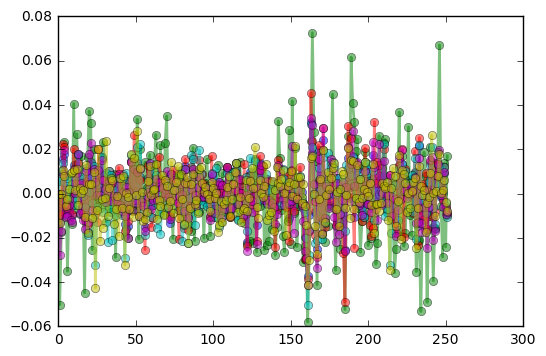

Clusters: 0
Members: ['MMM : 3M Company', 'ABT : Abbott Laboratories', 'ACN : Accenture plc', 'ATVI : Activision Blizzard', 'AYI : Acuity Brands Inc', 'ADBE : Adobe Systems Inc', 'AAP : Advance Auto Parts', 'A : Agilent Technologies Inc', 'AKAM : Akamai Technologies Inc', 'ALK : Alaska Air Group Inc', 'ALLE : Allegion', 'ADS : Alliance Data Systems', 'ALL : Allstate Corp', 'MO : Altria Group Inc', 'AMZN : Amazon.com Inc', 'AAL : American Airlines Group', 'AXP : American Express Co', 'ABC : AmerisourceBergen Corp', 'APH : Amphenol Corp A', 'AON : Aon plc', 'AJG : Arthur J. Gallagher & Co.', 'AIZ : Assurant Inc', 'T : AT&T Inc', 'ADSK : Autodesk Inc', 'ADP : Automatic Data Processing', 'AN : AutoNation Inc', 'AZO : AutoZone Inc', 'AVY : Avery Dennison Corp', 'BCR : Bard (C.R.) Inc.', 'BAX : Baxter International Inc.', 'BDX : Becton Dickinson', 'BBBY : Bed Bath & Beyond', 'BRK-B : Berkshire Hathaway', 'BBY : Best Buy Co. Inc.', 'HRB : Block H&R', 'BA : Boeing Company', 'BF-B : Brown-Forma

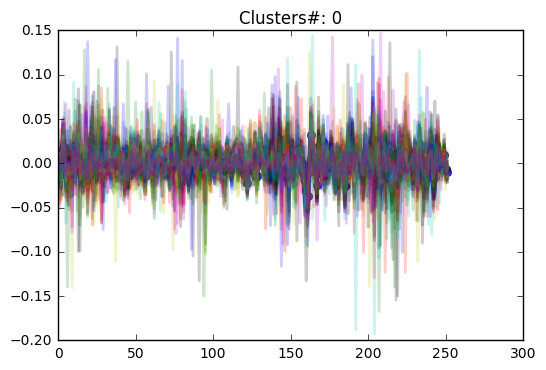

Clusters: 1
Members: ['APC : Anadarko Petroleum Corp', 'APA : Apache Corporation', 'BHI : Baker Hughes Inc', 'COG : Cabot Oil & Gas', 'CHK : Chesapeake Energy', 'CVX : Chevron Corp.', 'XEC : Cimarex Energy', 'CXO : Concho Resources', 'COP : ConocoPhillips', 'DVN : Devon Energy Corp.', 'DO : Diamond Offshore Drilling', 'EOG : EOG Resources', 'EQT : EQT Corporation', 'FTI : FMC Technologies Inc.', 'FCX : Freeport-McMoran Cp & Gld', 'HAL : Halliburton Co.', 'HP : Helmerich & Payne', 'HES : Hess Corporation', 'KMI : Kinder Morgan', 'LYB : LyondellBasell', 'MRO : Marathon Oil Corp.', 'MUR : Murphy Oil', 'NOV : National Oilwell Varco Inc.', 'NFX : Newfield Exploration Co', 'NBL : Noble Energy Inc', 'OXY : Occidental Petroleum', 'OKE : ONEOK', 'PXD : Pioneer Natural Resources', 'RRC : Range Resources Corp.', 'SLB : Schlumberger Ltd.', 'SWN : Southwestern Energy', 'SE : Spectra Energy Corp.', 'RIG : Transocean', 'WMB : Williams Cos.', 'WYNN : Wynn Resorts Ltd']


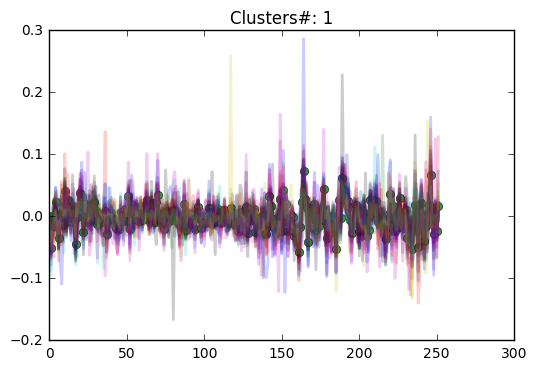

Clusters: 2
Members: ['ABBV : AbbVie', 'AET : Aetna Inc', 'ALXN : Alexion Pharmaceuticals', 'AGN : Allergan plc', 'GOOGL : Alphabet Inc Class A', 'GOOG : Alphabet Inc Class C', 'AMGN : Amgen Inc', 'ANTM : Anthem Inc.', 'AVGO : Avago Technologies', 'BIIB : BIOGEN IDEC Inc.', 'BSX : Boston Scientific', 'BMY : Bristol-Myers Squibb', 'CAH : Cardinal Health Inc.', 'CELG : Celgene Corp.', 'CNC : Centene Corporation', 'CI : CIGNA Corp.', 'EW : Edwards Lifesciences', 'ENDP : Endo International', 'ESRX : Express Scripts', 'GILD : Gilead Sciences', 'HCA : HCA Holdings', 'HOLX : Hologic', 'HUM : Humana Inc.', 'ILMN : Illumina Inc', 'LH : Laboratory Corp. of America Holding', 'LRCX : Lam Research', 'LLY : Lilly (Eli) & Co.', 'MNK : Mallinckrodt Plc', 'MCK : McKesson Corp.', 'MDT : Medtronic plc', 'MYL : Mylan N.V.', 'PRGO : Perrigo', 'PFE : Pfizer Inc.', 'QRVO : Qorvo', 'DGX : Quest Diagnostics', 'REGN : Regeneron', 'RCL : Royal Caribbean Cruises Ltd', 'SWKS : Skyworks Solutions', 'STJ : St Jude M

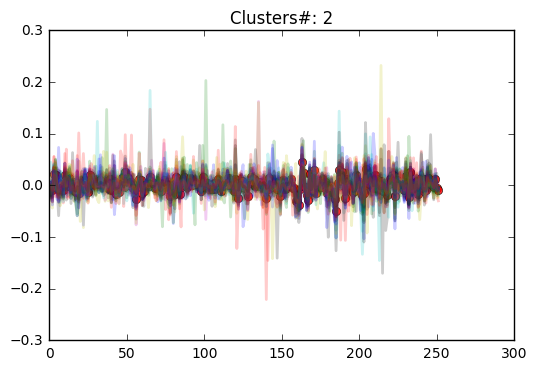

Clusters: 3
Members: ['AMT : American Tower Corp A', 'AIV : Apartment Investment & Mgmt', 'AVB : AvalonBay Communities, Inc.', 'BXP : Boston Properties', 'DLR : Digital Realty Trust', 'EQR : Equity Residential', 'ESS : Essex Property Trust Inc', 'EXPE : Expedia Inc.', 'EXR : Extra Space Storage', 'FRT : Federal Realty Investment Trust', 'GGP : General Growth Properties Inc.', 'HCP : HCP Inc.', 'HST : Host Hotels & Resorts', 'IRM : Iron Mountain Incorporated', 'KIM : Kimco Realty', 'MAC : Macerich', 'PLD : Prologis', 'PSA : Public Storage', 'O : Realty Income Corporation', 'SPG : Simon Property Group Inc', 'SLG : SL Green Realty', 'UDR : UDR Inc', 'VTR : Ventas Inc', 'VNO : Vornado Realty Trust', 'HCN : Welltower Inc.', 'WY : Weyerhaeuser Corp.']


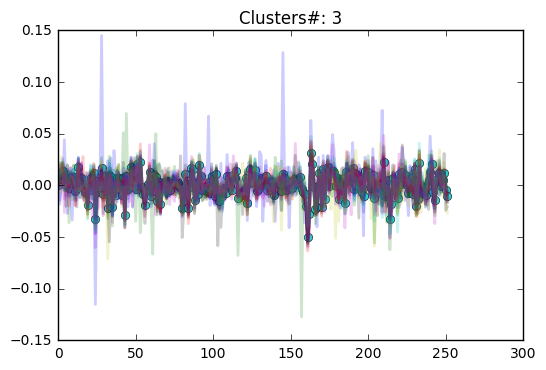

Clusters: 4
Members: ['AMG : Affiliated Managers Group Inc', 'AFL : AFLAC Inc', 'APD : Air Products & Chemicals Inc', 'ALB : Albemarle Corp', 'AA : Alcoa Inc', 'AIG : American International Group, Inc.', 'AMP : Ameriprise Financial', 'AME : Ametek', 'ADI : Analog Devices, Inc.', 'AAPL : Apple Inc.', 'AMAT : Applied Materials Inc', 'ADM : Archer-Daniels-Midland Co', 'BLL : Ball Corp', 'BAC : Bank of America Corp', 'BBT : BB&T Corporation', 'BLK : BlackRock', 'BWA : BorgWarner', 'COF : Capital One Financial', 'CAT : Caterpillar Inc.', 'CBS : CBS Corp.', 'CTL : CenturyLink Inc', 'CF : CF Industries Holdings Inc', 'SCHW : Charles Schwab Corporation', 'CSCO : Cisco Systems', 'C : Citigroup Inc.', 'CFG : Citizens Financial Group', 'CMA : Comerica Inc.', 'GLW : Corning Inc.', 'CSX : CSX Corp.', 'CMI : Cummins Inc.', 'DE : Deere & Co.', 'DLPH : Delphi Automotive', 'DFS : Discover Financial Services', 'DISCA : Discovery Communications-A', 'DISCK : Discovery Communications-C', 'DOV : Dover Corp.

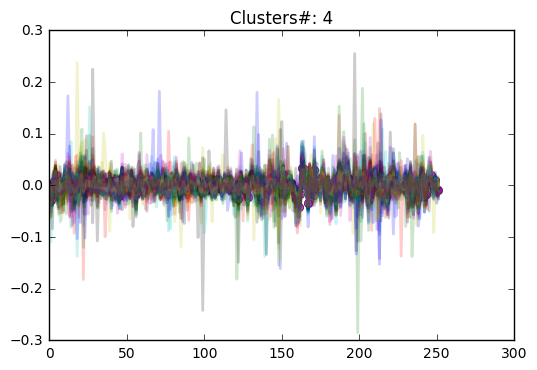

Clusters: 5
Members: ['AES : AES Corp', 'LNT : Alliant Energy Corp', 'AEE : Ameren Corp', 'AEP : American Electric Power', 'AWK : American Water Works Company Inc', 'CNP : CenterPoint Energy', 'CMS : CMS Energy', 'ED : Consolidated Edison', 'D : Dominion Resources', 'DTE : DTE Energy Co.', 'DUK : Duke Energy', "EIX : Edison Int'l", 'ETR : Entergy Corp.', 'ES : Eversource Energy', 'EXC : Exelon Corp.', 'FE : FirstEnergy Corp', 'NEM : Newmont Mining Corp. (Hldg. Co.)', 'NI : NiSource Inc.', 'NRG : NRG Energy', 'PCG : PG&E Corp.', 'PNW : Pinnacle West Capital', 'PPL : PPL Corp.', 'PEG : Public Serv. Enterprise Inc.', 'SCG : SCANA Corp', 'SRE : Sempra Energy', 'SO : Southern Co.', 'WEC : Wisconsin Energy Corporation', 'XEL : Xcel Energy Inc']


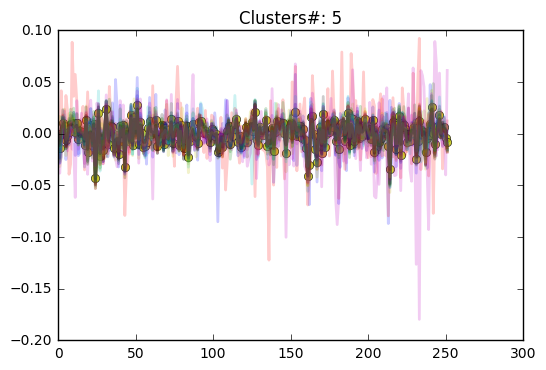

In [91]:
priceDailyReturnTrans2 = priceDailyReturn.T
prediction, model, c_data = visualize_clusters(priceDailyReturnTrans2,n_clusters = 6)